# 175. Combine Two Tables  

Table: `Person`  
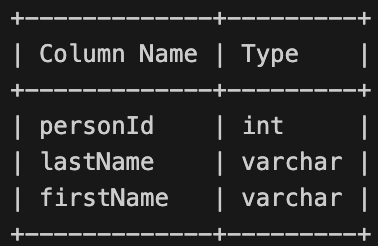  
personId is the primary key (column with unique values) for this table.  
This table contains information about the ID of some persons and their first and last names.  
 

Table: `Address`  

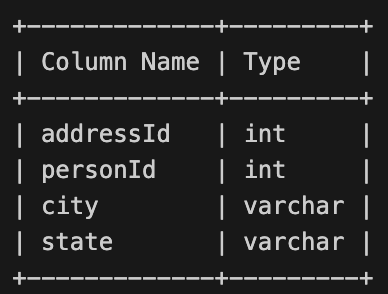  
addressId is the primary key (column with unique values) for this table.  
Each row of this table contains information about the city and state of one person with ID = PersonId.  
 

Write a solution to report the first name, last name, city, and state of each `person` in the Person table.   
If the address of a `personId` is not present in the `Address` table, report `null` instead.  
  
Return the result table in any order.  
  
The result format is in the following example.  
  
   
  
**Example 1**:  

**Input**:   
Person table: 

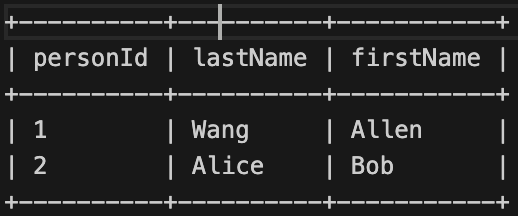  
Address table:  
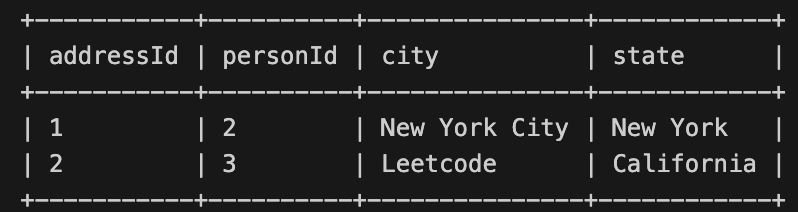  
**Output**:     
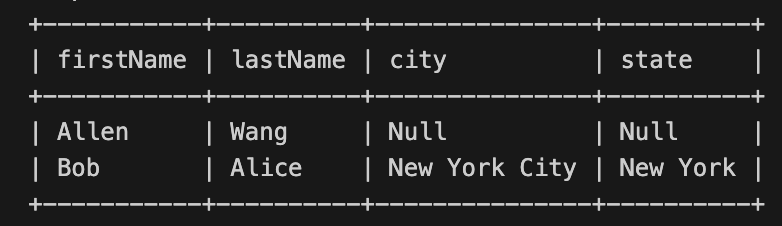  
**Explanation**:   
  
    
    
There is no address in the address table for the personId = 1 so we return null in their city and state.  
addressId = 1 contains information about the address of personId = 2.  

In [15]:
import pandas as pd


def combine_two_tables(person: pd.DataFrame, address: pd.DataFrame) -> pd.DataFrame:
    """merging two tables on personId key
    input:
        person (dataframe) with 3 columns:
            - personId (int) (primary key)
            - lastName (varchar)
            - firstName (varchar)
        address (dataframe) with 4 columns:
            - addressId (int) (primary key)
            - personId (int)
            - city (varchar)
            - state (varchar)
    returns:
        merged tables (dataframe) with 4 colunns:
            - lastName (varchar)
            - firstName (varchar)
            - city (varchar)
            - state (varchar)
    """
    return person.merge(address, on="personId", how="left")[
        ["firstName", "lastName", "city", "state"]
    ]

# Testing
- Preparing dataframes to testing

In [16]:
person = pd.DataFrame(
    {
        "personId": [1, 2, 3, 4, 5, 6, 7, 8, 9],
        "lastName": [
            "Kowal",
            "Kowalski",
            "Nowak",
            "Dobrowolski",
            "Wojciechowski",
            "Słowik",
            "Smith",
            "Nowak",
            "Palin",
        ],
        "firstName": [
            "Kamil",
            "Alex",
            "Michalina",
            "Jan",
            "Paulina",
            "Miszel",
            "Ada",
            "Adam",
            "Jan",
        ],
    }
)


address = pd.DataFrame(
    {
        "addressId": [11, 22, 33, 44, 55],
        "personId": [1, 2, 3, 4, 5],
        "city": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"],
        "state": ["NY", "CA", "IL", "TX", "AZ"],
    }
)

- checking function output

In [17]:
combine_two_tables(person=person, address=address)

,lastName,firstName,city,state
0,Kowal,Kamil,New York,NY
1,Kowalski,Alex,Los Angeles,CA
2,Nowak,Michalina,Chicago,IL
3,Dobrowolski,Jan,Houston,TX
4,Wojciechowski,Paulina,Phoenix,AZ
5,Słowik,Miszel,NaN,NaN
6,Smith,Ada,NaN,NaN
7,Nowak,Adam,NaN,NaN
8,Palin,Jan,NaN,NaN
